# Simple linear regression

## Import the relevant libraries

In [1]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
data = pd.read_csv('/home/home02/earshar/data_science/main/data/csv_datasets/simple_linear_regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Create the regression

### Declare the dependent and independent variables

- There is a single independent variable, `SAT`
- And a single dependent variable, `GPA`
- Often, it is useful to check the shapes of the features

In [3]:
x = data['SAT']
y = data['GPA']

In [4]:
x.shape

(84,)

In [5]:
y.shape

(84,)

### In order to feed `x` to sklearn, it should be a 2D array (matrix)

- The array needs to be reshaped
- This part will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

In [6]:
# x_matrix = x.values.reshape(84,1)
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

### Regression itself

- Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Start by creating a linear regression object 
- The whole learning process boils down to fitting the regression
- Note that the first argument is the independent variable, while the second is the dependent (unlike with `StatsModels`)

In [16]:
reg = LinearRegression()

In [18]:
reg.fit(x_matrix,y.values)

LinearRegression()

### Get some useful metrics from the `LinearRegression` method

- R-squared
- Coefficient (will have multiple values when doing multilinear regression)
- Intercept
- Making predictions (return the value of the target (`GPA`) corresponding to a value of the feature (`SAT`)). The `predict` method doesn't work if you input a single value (e.g. 1740).

In [19]:
reg.score(x_matrix,y)

0.40600391479679754

In [20]:
reg.coef_

array([0.00165569])

In [21]:
reg.intercept_

0.2750402996602799

In [29]:
new_data = pd.DataFrame(data=[1740,1760], columns=['SAT'])
reg.predict(new_data.values)
new_data['Predicted GPA'] = reg.predict(new_data.values)
new_data

,SAT,Predicted GPA
0,1740,3.155938
1,1760,3.189051


### Redo the original linear regression plot

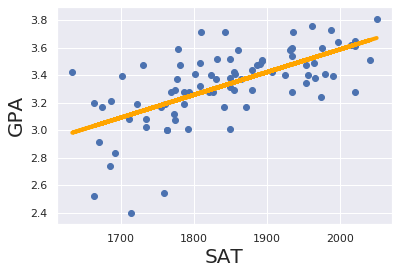

In [30]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()